## Importing Libraries

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from Ant_algo import *
import timeit
import random

In [3]:
data  = pd.read_csv('C:/Users/Amir Hossein/Desktop/Project/dataset/My-Data.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = pd.DataFrame(y)
X.shape, y.shape

((1272, 5), (1272, 1))

# SVR - ACO

_ Iteration: 0 Max score: 0.8833 Avg score 0.4595
Time:  13.096512600081041
_ Iteration: 1 Max score: 0.8833 Avg score 0.6045
Time:  10.957583799958229
_ Iteration: 2 Max score: 0.8833 Avg score 0.6691
Time:  11.154473300091922
_ Iteration: 3 Max score: 0.8123 Avg score 0.7447
Time:  10.866502200020477
_ Iteration: 4 Max score: 0.8123 Avg score 0.7417
Time:  12.430396700045094
_ Iteration: 5 Max score: 0.8123 Avg score 0.7713
Time:  13.886994800064713
_ Iteration: 6 Max score: 0.8123 Avg score 0.7618
Time:  13.825396199943498
_ Iteration: 7 Max score: 0.8123 Avg score 0.7624
Time:  12.748626299900934
_ Iteration: 8 Max score: 0.8123 Avg score 0.7693
Time:  12.4717153001111
_ Iteration: 9 Max score: 0.8123 Avg score 0.7505
Time:  11.886727900011465
_ Iteration: 10 Max score: 0.8123 Avg score 0.7712
Time:  12.753015799913555
_ Iteration: 11 Max score: 0.8123 Avg score 0.7667
Time:  14.609786099987105
_ Iteration: 12 Max score: 0.8123 Avg score 0.7825
Time:  15.409558899933472
_ Iteration

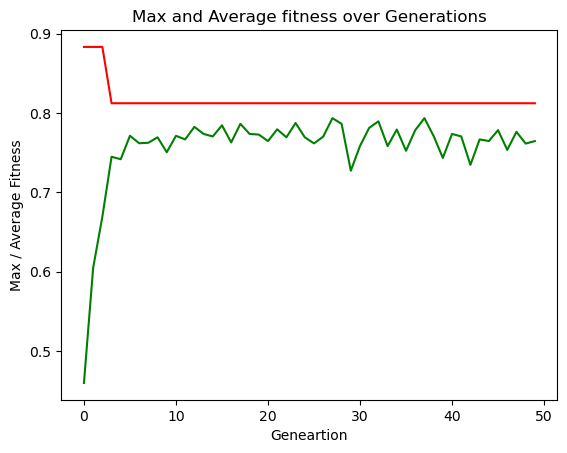

In [5]:
eval_class = Evaluate(X, y, SVR())
iterationCounter = 0

NUM_ANTS = 30
NUM_FEATURES = len(eval_class)
MAX_ITERATION = 50
ALPHA = 2
BETA = 1
RO = 0.2
HOF = 10
RANDOM_SEED = 42
FEATURE_PENALTY_FACTOR = 0.001

random.seed(RANDOM_SEED)


max_evaluate = list()
mean_evaluate = list()

eta = corr(n_f=NUM_FEATURES, data=X)
pher = pheromone(n_f=NUM_FEATURES)
features = map_features(n_f=NUM_FEATURES)
all_time = list()
best_ants = list()

while iterationCounter < MAX_ITERATION:
    now = timeit.default_timer()
    iterationCounter += 1
    colony = Colony()
    best = 0
    for i in range(NUM_ANTS):
        ant = Ant()
        select_next_feature(features, n_f=NUM_FEATURES, ant=ant, pher=pher, eta=eta, alpha=ALPHA, beta=BETA)
        colony.colony_add(ant)
    
#     if iterationCounter != 1:
#         for i in range(HOF):
#             colony.best_add(best_ants[i])
    

    pher_emp = pher_empty(n_f=NUM_FEATURES)
    
    best_indices, r2_best_indices, result_scores = colony.best(colony, eval_class, HOF)
    counter = 0
    best_ants = list()
    for i in best_indices:
        l = len(colony.colony[i])
        best_ants.append(colony.colony[i])
        r2_ant = r2_best_indices[counter]
        r2_update = 30 / ((1 - r2_ant) * (l))
        best_ant_pher = pher_change(n_f=NUM_FEATURES, ant_features_best=colony.ant_features[i],
                                    r2_best= r2_update)
        pher_emp = np.add(pher_emp, best_ant_pher)
        counter += 1
        
        
    pher = pheromone(n_f=NUM_FEATURES, n_iter=iterationCounter, pher_before=pher, pher_change=pher_emp, ro=RO)
    duration = timeit.default_timer() - now
    
    max_evaluate.append(np.max(result_scores))
    mean_evaluate.append(np.mean(result_scores))
    all_time.append(duration)

    print("_ Iteration: %d Max score: %.4f Avg score %.4f" % (iterationCounter - 1, np.max(result_scores), np.mean(result_scores)))
    print("Time: ", duration)
    
    best_ant = colony.colony[best_indices[0]]
    r2_best_ant = r2_best_indices[0]
    
print("Best Individual: " ,best_ant)
print("Number of features selected: ", len(best_ant))
print("Best R2: ", r2_best_ant)
print("Total Time Consumed: %.3f minutes" % float(sum(all_time)/60))
plt.plot(max_evaluate, color="red")
plt.plot(mean_evaluate, color="green")
plt.xlabel("Geneartion")
plt.ylabel("Max / Average Fitness")
plt.title("Max and Average fitness over Generations")
plt.savefig("C:/Users/Amir Hossein/Desktop/Project/Figures//ACO_svr", dpi=1000)
plt.show()